# Machine Learning Project: ML_Real estate price predictions

## Predict Real Estate Prices using an API requested to Idealista

In [ ]:
'''
Notebook_2:
In the previous notebook_1 (ML Real_estate_price_predictions_Notebook_1), the dataset 'df total' was saved, so, we will work with it.
'''

In [ ]:
'''
By extracting data using the Idealista API, it will be possible to perform monthly searches and develop a model that allows for calculating 
updated property prices. The main objective is to analyze whether sales prices represent a favorable purchasing opportunity in **Asturias**. 
This will allow potential buyers to make more informed decisions in the real estate market.

Search API lets you integrate property information published on idealista into your site or app.

**https://developers.idealista.com/access-request**
'''


In [32]:
# Importing  -> Importando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

### 2. The function `data_report(df)` generates a comprehensive report on a DataFrame, offering valuable insights into its columns. This report serves as a crucial tool for our analysis, data cleaning, and overall understanding of the dataset, helping us make informed decisions as we work with the data.

In [33]:
def data_report(df):
    '''Function generates a detailed report on a DataFrame'''
    # Creating a DataFrame containing column names
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Getting the data type of each column
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Missing values:
    # Calculating the percentage of null values ​​(missing values) for each column
    # percent_missing = round(df.isnull().sum() * 100 / len(df), 2)   --> (*)
    percent_missing = round(df.isnull().mean() * 100, 2)              # changed to the line above (*). It's more concise and does the same thing
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])
    
    # Counting the number of unique values ​​in each column
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    # Calculating the cardinality percentage (proportion of unique values ​​relative to the total number of rows)
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    # Concatenating the results
    # concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1)   # 'sort=False' has been removed: this doesn't need to be specified. It doesn't affect the result in this case.

    # Settig the column (COL_N) as an index of the resulting DataFrame
    concatenado.set_index('COL_N', drop=True, inplace=True)

    # Returning the resulting transposed DataFrame
    return concatenado.T

### 3. Working with the dataset 'df_total'

In [34]:
# Accessing the dataset  ->  Accediendo al dataset
df_total = pd.read_csv('C:/Users/argpe/REPO_PRUEBA_2/ML_Real_estate_price_predictions/src/data_sample/idealista_astur.csv')
df_total.head()

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,...,savedAd,notes,topNewDevelopment,topPlus,floor,exterior,hasLift,parkingSpace,neighborhood,newDevelopmentFinished
0,0,106100857,https://img4.idealista.com/blur/WEB_LISTING/0/...,REF_31176,36,9500.0,"{'price': {'amount': 9500.0, 'currencySuffix':...",chalet,sale,65.0,...,{},[],False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1,106567113,https://img4.idealista.com/blur/WEB_LISTING/90...,Myo,20,150000.0,"{'price': {'amount': 150000.0, 'currencySuffix...",countryHouse,sale,290.0,...,{},[],False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,97273645,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,8,60000.0,"{'price': {'amount': 60000.0, 'currencySuffix'...",flat,sale,283.0,...,{},[],False,False,en,True,False,NaN,NaN,NaN
3,3,106463395,https://img4.idealista.com/blur/WEB_LISTING/0/...,62659,4,35000.0,"{'price': {'amount': 35000.0, 'currencySuffix'...",chalet,sale,537.0,...,{},[],False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100774492,https://img4.idealista.com/blur/WEB_LISTING/0/...,0050124471,1,64700.0,"{'price': {'amount': 64700.0, 'currencySuffix'...",flat,sale,96.0,...,{},[],False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_total.shape

(4650, 45)

In [36]:
len(df_total.columns)

45

In [37]:
df_total.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'price', 'priceInfo', 'propertyType', 'operation', 'size',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'status', 'newDevelopment', 'priceByArea',
       'change', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'savedAd', 'notes',
       'topNewDevelopment', 'topPlus', 'floor', 'exterior', 'hasLift',
       'parkingSpace', 'neighborhood', 'newDevelopmentFinished'],
      dtype='object')

In [38]:
# Obtaining the number of apartments in Asturias (equal to 1040)  -> Obteniendo el número de apartamentos en Asturias (igual a 1040)
apartments_asturias = df_total.loc[df_total.province == 'Asturias'] 
apartments_asturias.shape

(1040, 45)

In [39]:
# Visualizing the data frame  -> Visualización del marco de datos
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4650 non-null   int64  
 1   propertyCode            4650 non-null   int64  
 2   thumbnail               4646 non-null   object 
 3   externalReference       3977 non-null   object 
 4   numPhotos               4650 non-null   int64  
 5   price                   4650 non-null   float64
 6   priceInfo               4650 non-null   object 
 7   propertyType            4650 non-null   object 
 8   operation               4650 non-null   object 
 9   size                    4650 non-null   float64
 10  rooms                   4650 non-null   int64  
 11  bathrooms               4650 non-null   int64  
 12  address                 4650 non-null   object 
 13  province                4650 non-null   object 
 14  municipality            4650 non-null   

In [40]:
# Getting the data types  -> Obteniendo los tipos de datos
data_types = df_total.dtypes
data_types

Unnamed: 0                  int64
propertyCode                int64
thumbnail                  object
externalReference          object
numPhotos                   int64
price                     float64
priceInfo                  object
propertyType               object
operation                  object
size                      float64
rooms                       int64
bathrooms                   int64
address                    object
province                   object
municipality               object
district                   object
country                    object
latitude                  float64
longitude                 float64
showAddress                  bool
url                        object
distance                    int64
description                object
hasVideo                     bool
status                     object
newDevelopment               bool
priceByArea               float64
change                     object
detailedType               object
suggestedTexts

In [41]:
# Calculating the percentage of missing values  -> Calculando el porcentaje de valores faltantes
missing_values = df_total.isnull().mean() * 100
missing_values

Unnamed: 0                 0.000000
propertyCode               0.000000
thumbnail                  0.086022
externalReference         14.473118
numPhotos                  0.000000
price                      0.000000
priceInfo                  0.000000
propertyType               0.000000
operation                  0.000000
size                       0.000000
rooms                      0.000000
bathrooms                  0.000000
address                    0.000000
province                   0.000000
municipality               0.000000
district                  31.634409
country                    0.000000
latitude                   0.000000
longitude                  0.000000
showAddress                0.000000
url                        0.000000
distance                   0.000000
description                0.086022
hasVideo                   0.000000
status                     0.193548
newDevelopment             0.000000
priceByArea                0.000000
change                     0

In [43]:
# Getting the number of unique values -> Obteniendo el número de valores únicos
unique_values = df_total.nunique()
unique_values

Unnamed: 0                  50
propertyCode              4507
thumbnail                 4495
externalReference         3732
numPhotos                  137
price                      882
priceInfo                 1982
propertyType                 6
operation                    1
size                       569
rooms                       19
bathrooms                   18
address                   3420
province                    14
municipality               528
district                   320
country                      1
latitude                  4429
longitude                 4429
showAddress                  2
url                       4507
distance                  4271
description               4444
hasVideo                     2
status                       3
newDevelopment               2
priceByArea               2516
change                       1
detailedType                16
suggestedTexts            3759
hasPlan                      2
has3DTour                    2
has360  

### 4. SPLIT TRAIN/TEST
- Splitting training and test sets (80-20%). Obtaining a table of average costs per square meter by district, and generating a bar chart and compare prices per square meter (m2) across the different districts of Asturias.

- Separación de los conjuntos de entrenamiento y prueba (80-20%). Se obtiene una tabla de costes medios por metro cuadrado por distrito, se genera un gráfico de barras y se comparan los precios por metro cuadrado (m²) en los diferentes distritos de Asturias.


In [ ]:
'''
The apartment number in Asturias is 1040.
El número de apartamento en Asturias es de 1040

# apartments_asturias = df_total.loc[df_total.province == 'Asturias'] 
# apartments_asturias.shape'
'''

(1040, 45)

In [45]:
# Splitting training and test sets (80-20%)  -> División de conjuntos de entrenamiento y prueba (80-20%)
X_train, X_test, y_train, y_test = train_test_split(apartments_asturias.drop('price', axis=1),
                                                    apartments_asturias['price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(832, 44)
(832,)
(208, 44)
(208,)


In [48]:
# Obtaining a table of average costs per square meter by district  -> Obteniendo una tabla de costes medios por metro cuadrado por distrito
# Using the train values
value_m2 = X_train[['district','priceByArea']].groupby('district').mean().sort_values(by='priceByArea')
value_m2

,priceByArea
district,
La Villa - Bazuelo,223.000000
Ujo - Cenera,313.000000
Sta.Marina - Polígono,430.000000
Llaranes,526.500000
San Pedro - Siana,533.571429
Carbayin-Lieres-Valdesoto,743.333333
Parroquias surorientales,773.600000
Figaredo - Turón,785.000000
Sama,818.500000


C:\Users\argpe\AppData\Local\Temp\ipykernel_14972\1058464920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_m2.priceByArea, y=value_m2.index, orient='h', palette='viridis')


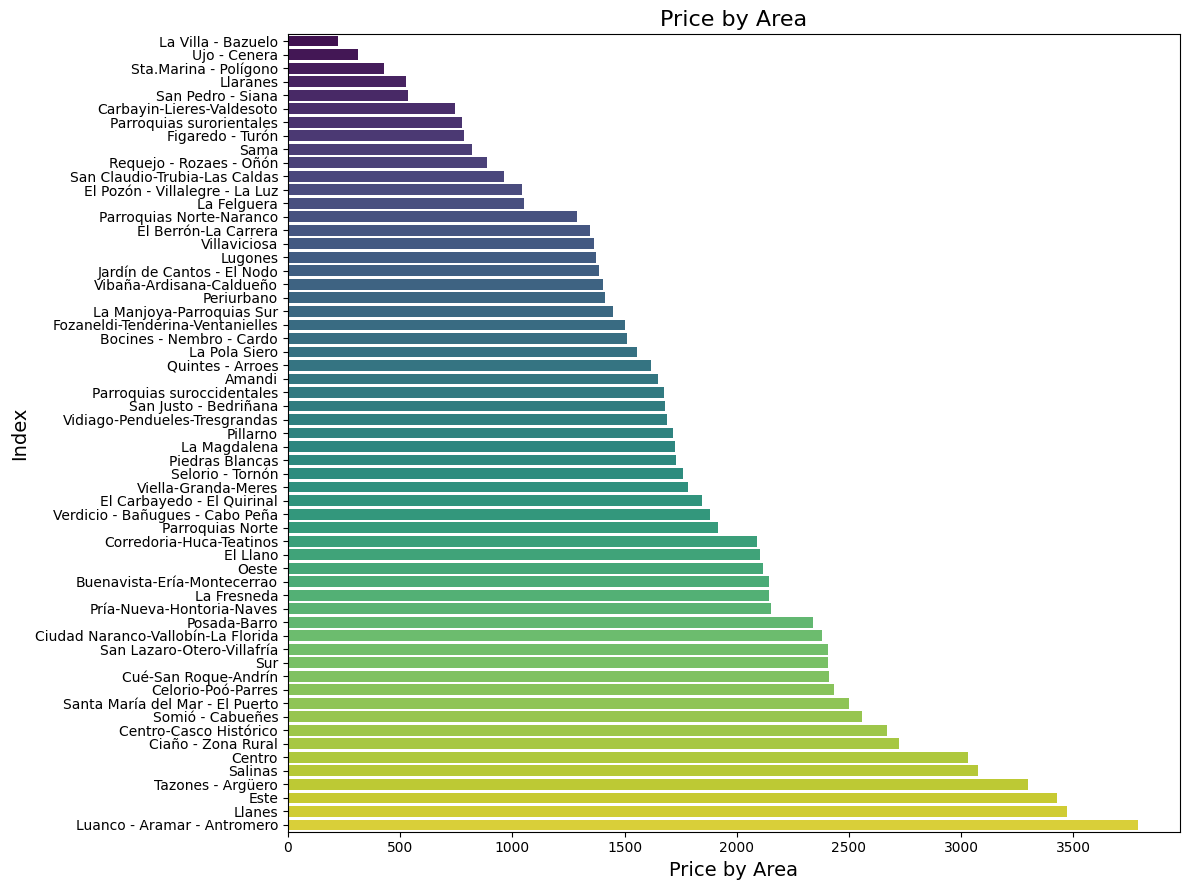

In [ ]:
# Adjusting the size of the figure  ->  Ajustando el tamaño de la figura
plt.figure(figsize=(12, 9))

# Generating a horizontal bar chart  -> Generando un gráfico de barras horizontal
sns.barplot(x=value_m2.priceByArea, y=value_m2.index, orient='h', palette='viridis')

# # Adjusting the axes and adding titles and labels  -> Ajustando los ejes y agregando títulos y etiquetas
plt.title('Price by Area', fontsize=16)    # Chart title   -> Título del gráfico
plt.xlabel('Price by Area', fontsize=14)   # X-axis label  -> Etiqueta del eje X
plt.ylabel('Index', fontsize=14)           # Y-axis label  -> Etiqueta del eje Y

# Adjusting the spacing  -> Ajustando el espaciado
plt.tight_layout()

# Showing the chart  -> Mostrando el gráfico
plt.show()


### 5. miniEDA

In [ ]:
# The following columns will not be necessary for the analysis, they do not influence the price
# Las siguientes columnas no serán necesarias para el análisis, no influyen en el precio.
'''
- operation: Not necessary, refers to the sale operation.
- country: Not necessary, the analysis is performed in Spain.
- labels, newDevelopmentFinished: Not necessary, many missing items.
- address, showaddress, distance: Not necessary, I will use the latitude and longitude.
- newDevelopment: Not necessary, has a 99.5% False.
- description: Not necessary, has duplicate information, the information is in the 'detailedType' column.
- suggestedTexts: Not necessary, has duplicate information, the information is in the 'detailedType' column.
- municipality, province: Not necessary, always in Asturias.
- priceByArea: closely related to the columns ('price'/'size').
- topNewDevelopment: Not necessary, has 100% False.
- superTopHighlight: Not necessary, has 100% False.
'''

"\nThe following columns are not used for analysis and do not influence the price\n\n- operation: Not required, refers to the sale operation.\n- address, showaddress, distance: I will use the latitude and longitude.\n- country: Not required, the analysis is performed in Spain.\n- labels, newDevelopmentFinished: Many missing items.\n- newDevelopment: Not required, has a 99.5% False result.\n- municipality, province: Not required, always in Asturias.\n- priceByArea: This is correlated with label ('price'/'size')\n- description: Not necessary, has duplicate information, the information is in the 'detailedType' column\n- suggestedTexts: Not necessary, has duplicate information, the information is in the 'detailedType' column\n- topNewDevelopment: Not necessary, has 100% False\n- superTopHighlight: Not necessary, has 100% False\n"

In [50]:
info_idealista = ['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference', 'numPhotos','url','hasPlan', 'has3DTour', 'has360', 'hasVideo','hasStaging']
operation = ['operation']
address = ['address', 'showAddress', 'distance','country']
missings = ['labels', 'newDevelopmentFinished','neighborhood','newDevelopment','topNewDevelopment', 'superTopHighlight']
asturias = ['municipality', 'province']
correlacion = ['priceByArea']                       # It can be used for further analysis
duplicated = ['suggestedTexts' ,'description']

In [51]:
delete_cols = info_idealista + operation + address + missings + asturias + correlacion + duplicated

In [62]:
# Visualizing X_train  -> Visualizando X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 565 to 3920
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              832 non-null    int64  
 1   propertyCode            832 non-null    int64  
 2   thumbnail               830 non-null    object 
 3   externalReference       754 non-null    object 
 4   numPhotos               832 non-null    int64  
 5   priceInfo               832 non-null    object 
 6   propertyType            832 non-null    object 
 7   operation               832 non-null    object 
 8   size                    832 non-null    float64
 9   rooms                   832 non-null    int64  
 10  bathrooms               832 non-null    int64  
 11  address                 832 non-null    object 
 12  province                832 non-null    object 
 13  municipality            832 non-null    object 
 14  district                645 non-null    obje

In [53]:
X_train.shape

(832, 44)

In [ ]:
'''
Price and Outliers:
Generating a horizontal box plot showing the distribution of prices in the "price" column of the y_train DataFrame, allowing the 
visualization of the median, quartiles, and any outliers in the data.

Generando un diagrama de caja horizontal que muestra la distribución de los precios en la columna "price" del DataFrame y_train, permitiendo 
visualizar la mediana, los cuartiles y cualquier valor atípico en los datos.
'''

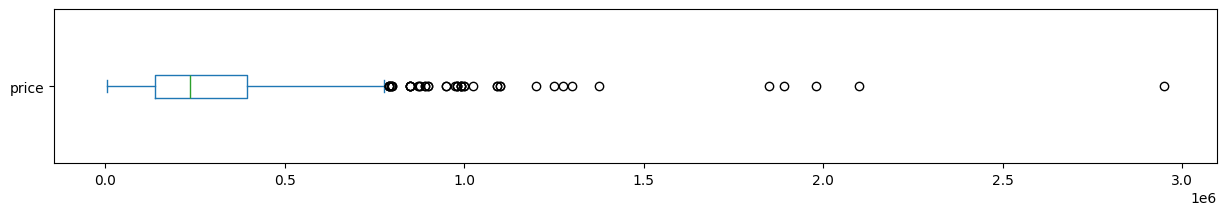

In [55]:
y_train.plot(kind="box", y="price",figsize=(15,2),vert=False); 

In [63]:
# Visualizing the number of outliers  -> Visualizando el número de outliers
len(apartments_asturias.loc[apartments_asturias.price>1000000]) # There are 19 outliers, almost 2.3% of the sample (832).

19

In [67]:
# Visualizing the most expensive outlier (La Manjoya-Parroquias Sur, Oviedo, Asturias)  -> Visualizando el outlier más caro (Oviedo, Asturias)
apartments_asturias[['size','district','price']].loc[apartments_asturias.price>2900000] 

,size,district,price
2827,882.0,La Manjoya-Parroquias Sur,2950000.0


In [ ]:
'''
We will work with some data preprocessing techniques used in data analysis and machine learning, in relation with the variables in some columns.

Trabajaremos con algunas técnicas de preprocesamiento de datos utilizada en el análisis de datos y en el aprendizaje automático, en  relación 
con las variable de algunas columnas.

'''

##### Calculating the relative distribution (proportion) of each category in the "propertyType" column of the X_train dataset with One Hot Encoding

In [ ]:
# Calculating the different types of properties (propertyType) in the dataset X_train, expressed as proportions of the total
# Calculando los diferentes tipos de propiedades (propertyType) en el dataset X_train, expresada como proporciones del total

X_train.propertyType.value_counts(normalize=True)

propertyType
flat            0.504808
chalet          0.405048
duplex          0.032452
penthouse       0.031250
countryHouse    0.020433
studio          0.006010
Name: proportion, dtype: float64

<Axes: ylabel='count'>

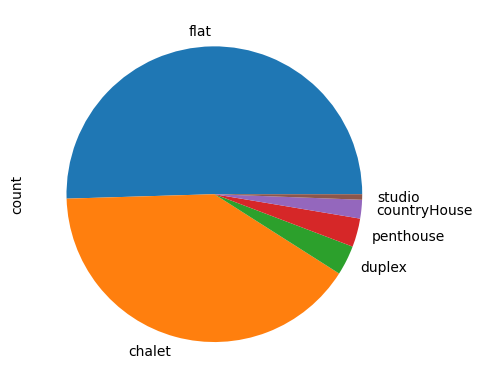

In [70]:
# Visualizing the proportion of different types of properties  -> Visualizando la proporción de diferentes tipos de propiedades
X_train.propertyType.value_counts().plot.pie()

In [ ]:
# one hot encoded
one_hot = ['propertyType']

##### Visualizing the distribution of the "size" column to filter out excessively high values. Finally, we plan to standardize the data to prepare it for modeling

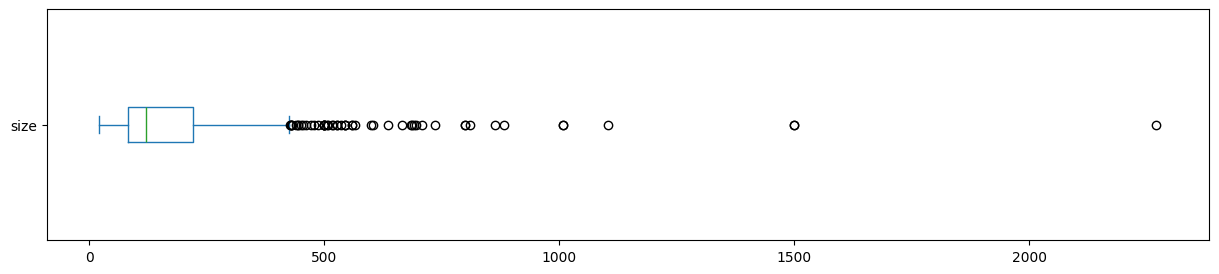

In [77]:
X_train.plot(kind="box", y="size",figsize=(15,3),vert=False);

In [78]:
X_train.loc[X_train['size'] > 2000]

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,priceInfo,propertyType,operation,size,rooms,...,savedAd,notes,topNewDevelopment,topPlus,floor,exterior,hasLift,parkingSpace,neighborhood,newDevelopmentFinished
3089,39,106402901,https://img4.idealista.com/blur/WEB_LISTING/0/...,11005,163,"{'price': {'amount': 700000.0, 'currencySuffix...",chalet,sale,2270.0,15,...,{},[],False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# StandardScaler
escalar = ['size']

##### Visualizing the values of the 'exterior' column, and create a list called 'booleanos', which contains the name of the 'exterior' column. This could probably be useful for applying similar operations to multiple columns, or if we needed to reference columns more flexibly.

In [ ]:
X_train.exterior.isna().value_counts()  # This means that there are 461 non-null values, and 371 null values ​​in the exterior column.

exterior
False    461
True     371
Name: count, dtype: int64

In [81]:
booleanos = ['exterior']